# Аналитика в авиакомпании

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий. Для этих наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Описание данных

База данных об авиаперевозках:
    
- Таблица **airports** — информация об аэропортах:
  - *airport_code* — трёхбуквенный код аэропорта
  - *airport_name* — название аэропорта
  - *city* — город
  - *timezone* — временная зона
- Таблица **aircrafts** — информация о самолётах:
  - *aircraft_code* — код модели самолёта
  - *model* — модель самолёта
  - *range* — количество самолётов
- Таблица **tickets** — информация о билетах:
  - *ticket_no* — уникальный номер билета
  - *passenger_id* — персональный идентификатор пассажира
  - *passenger_name* — имя и фамилия пассажира
- Таблица **flights** — информация о рейсах:
  - *flight_id* — уникальный идентификатор рейса
  - *departure_airport* — аэропорт вылета
  - *departure_time* — дата и время вылета
  - *arrival_airport* — аэропорт прилёта
  - *arrival_time* — дата и время прилёта
  - *aircraft_code* – id самолёта
- Таблица **ticket_flights** — стыковая таблица «рейсы-билеты»
  - *ticket_no* — номер билета
  - *flight_id* — идентификатор рейса
- Таблица **festivals** — информация о фестивалях
  - *festival_id* — уникальный номер фестиваля
  - *festival_date* — дата проведения фестиваля
  - *festival_city* — город проведения фестиваля
  - *festival_name* — название фестиваля

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика-в-авиакомпании" data-toc-modified-id="Аналитика-в-авиакомпании-1">Аналитика в авиакомпании</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span></li><li><span><a href="#1.-Импортируем-файлы-с-данными-и-изучим-информацию-в-них" data-toc-modified-id="1.-Импортируем-файлы-с-данными-и-изучим-информацию-в-них-1.2">1. Импортируем файлы с данными и изучим информацию в них</a></span></li><li><span><a href="#1.-Вывод" data-toc-modified-id="1.-Вывод-1.3">1. Вывод</a></span></li><li><span><a href="#2.-Города-с-наибольшим-количеством-рейсов-(топ-10)" data-toc-modified-id="2.-Города-с-наибольшим-количеством-рейсов-(топ-10)-1.4">2. Города с наибольшим количеством рейсов (топ-10)</a></span></li><li><span><a href="#2.-Вывод" data-toc-modified-id="2.-Вывод-1.5">2. Вывод</a></span></li><li><span><a href="#3.-Построение-графиков" data-toc-modified-id="3.-Построение-графиков-1.6">3. Построение графиков</a></span></li><li><span><a href="#3.-Вывод" data-toc-modified-id="3.-Вывод-1.7">3. Вывод</a></span></li></ul></li></ul></div>

## 1. Импортируем файлы с данными и изучим информацию в них

Выгрузим все необходимые нам библиотеки, и загрузим исходные файлы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
aircraft = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

In [3]:
display(aircraft.head(5))
display(city.head(5))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Таблица **aircraft** содержит 2 столбца:

- *model* — модель самолета
- *flights_amount* — количество рейсов для каждой модели самолетов в сентябре 2018 года

Таблица **city** содержит 2 столбца:

- *city* — город
- *average_flights* — среднем количестве рейсов, прибывающих в город за день в августе 2018 года

In [4]:
display(aircraft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Пропущеных значений в таблице **aircraft** нет, тип данных в каждом стобце корректный

In [5]:
display(city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Пропущенных значений в таблице **city** нет, тип данных в каждом столбце корректный, однако немного изменим столбец *average_flights*, а именно округлим значения до 2 цифр после запятой и поменям тип данных на наиболее подходящий с помощью метода `downcast`.

In [6]:
city['average_flights'] = round(city['average_flights'],2)
city['average_flights'] = pd.to_numeric(city['average_flights'], downcast='float')
display(city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float32
dtypes: float32(1), object(1)
memory usage: 1.3+ KB


None

Посмотрим все ли значения в таблице корректные

In [7]:
display(aircraft.describe().T)
display(city.describe().T)

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.493663,13.119347,1.0,2.0,3.0,5.87,129.770004


Значения в таблица выглядят корректно, ничего не выбивается из контекста.

Проверим таблицы на дубликаты

In [8]:
display(aircraft.duplicated().sum())
display(city.duplicated().sum())

0

0

Дубликатов ни в одной из таблиц обнаружено не было.

## 1. Вывод

Загрузили необходимые нам данные, две таблицы **aircraft** и **city**. 
В каждой таблице есть всего по два столбца, так для **aircraft** - это:
- *model* — модель самолета
- *flights_amount* — количество рейсов для каждой модели самолетов в сентябре 2018 года

а для **city** - это:
- *city* — город
- *average_flights* — среднем количестве рейсов, прибывающих в город за день в августе 2018 года

Данные в обех таблица полные, пропусков нет. Таблицы имеют корректные типы данных для всех столбцов. В таблице **city** столбце в столбце *average_flights* поменяли тип данных на наиболее подходящий `float32` и округлили значения до двух знаков после запятой.
Значения в обеих таблицах корректные, ничего не выделяется. Дубликатов не обнаружно.

Вернуться к [**Содержанию**](#Содержание)

## 2. Города с наибольшим количеством рейсов (топ-10)

Выберем из таблицы **city** топ-10 городов по количеству рейсов, для этого преобразуем ее, а именно отсортируем столбец *average_flights* по убыванию и ограничим столбец 10 записями, чтобы нам показывались только необходимые нам данные.

In [9]:
city = city.sort_values(by='average_flights', ascending=False)
city_top10 = city[:10]
display(city_top10)

,city,average_flights
43,Москва,129.770004
70,Санкт-Петербург,31.160000
54,Новосибирск,17.320000
33,Красноярск,11.580000
20,Екатеринбург,11.320000
67,Ростов-на-Дону,10.190000
63,Пермь,10.130000
10,Брянск,10.000000
74,Сочи,9.610000
84,Ульяновск,9.580000


## 2. Вывод

Выбрали из таблицы **city** топ-10 городов по количеству рейсов.
Самым популярным городом, ожидаемо, является *Москва* (129 рейсов), при этом с огромнейшим отрывом, тк следйющий за ней *Санкт-Петербург* (31 рейс) отстает почти на 100 рейсов. Топ-3 замыкает *Новосибирск* (17 рейсов), с количеством рейсов в половину меньшим чем у *Санкт-Петербурга*. Далее идут города с примерно равным количеством рейсов, так для городов *Екатеринбург и Красноярск* количество рейсов составляет 11 , для городов *Перьм, Ростов-на-Дону и Брянск* колличество рейсов составляет 10 , а для городов *Ульяновск и Советский* по 9 рейсов.

Вернуться к [**Содержанию**](#Содержание)

## 3. Построение графиков

В данном шаге построим графики для следующих параметров:
- модели самолетов и количество рейсов 
- города и количество рейсов
- топ-10 городов и количество рейсов

Напишем функцию, которая будет строить графики

In [10]:
def barplot (data, column1, column2, rot, t, xl):
    sns.set()
    ax = sns.barplot(x=column1, y=column2, data=data)
    plt.xticks(rotation=rot)
    plt.title(t, fontsize=25)
    plt.xlabel(xl, fontsize=15)
    plt.ylabel('Количество рейсов (шт.)', fontsize=15)

Построим график количества рейсов для разных моделей самолета

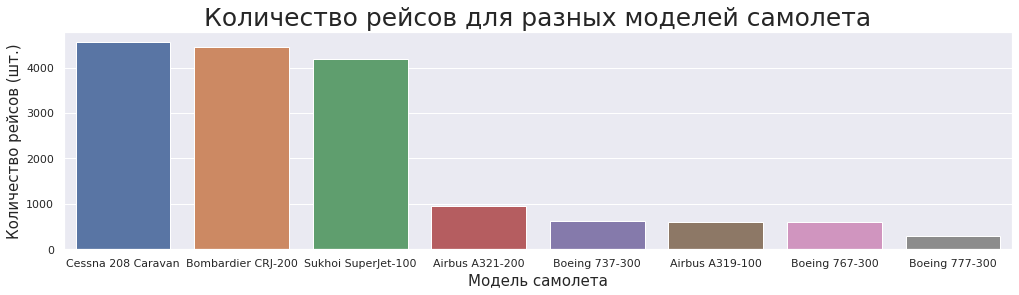

In [11]:
# Отсортируем талицу по столбцу flights_amount по убыванию
aircraft_sort = aircraft.sort_values(by='flights_amount', ascending=False)
# Построим график
plt.figure(figsize=(17,4))
barplot(
    aircraft_sort, 'model', 'flights_amount', 0,
    'Количество рейсов для разных моделей самолета', 'Модель самолета'
)
plt.show()

Построим график количества рейсов для разных городов

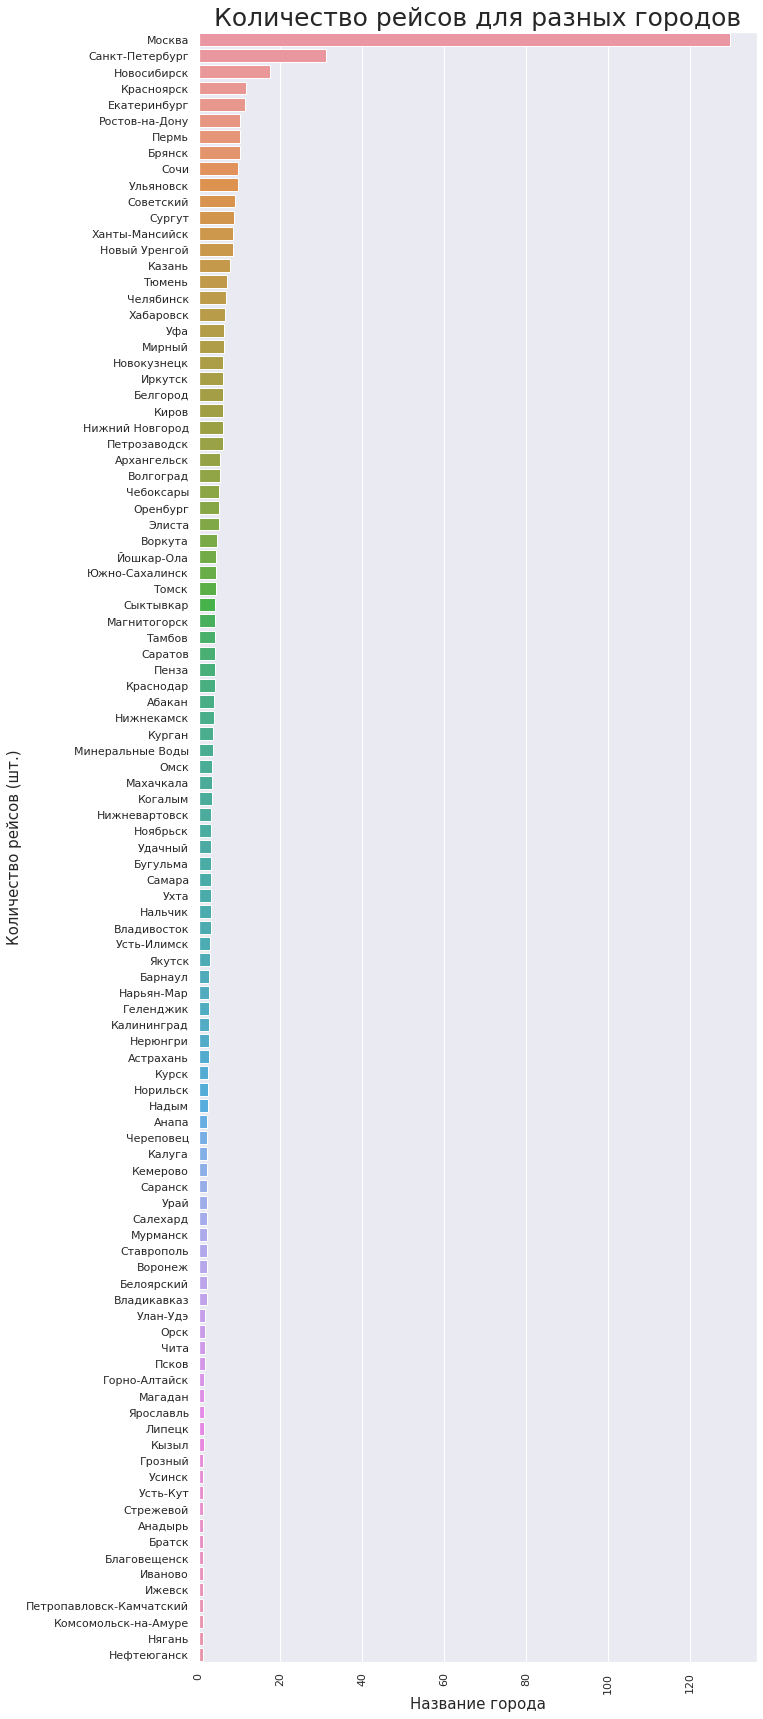

In [12]:
# Отсортируем талицу по столбцу average_flights по убыванию
city_sort = city.sort_values(by='average_flights', ascending=False)
# Построим график
plt.figure(figsize=(10,30))
barplot(city_sort, 'average_flights', 'city', 90,
    'Количество рейсов для разных городов', 'Название города'
)
plt.show()

Построим график количества рейсов для городов из топ-10

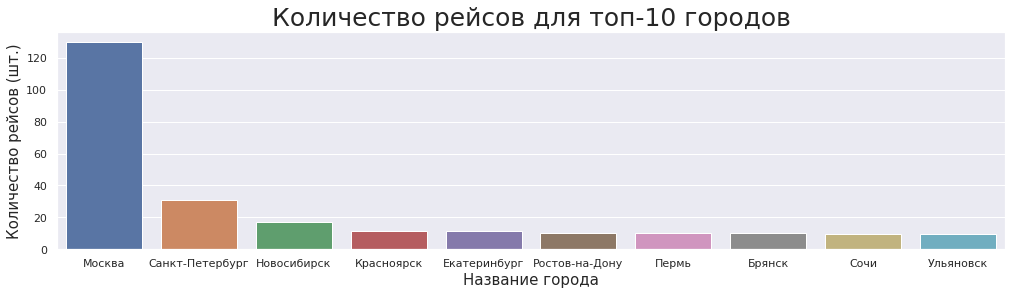

In [13]:
plt.figure(figsize=(17,4))
barplot(
    city_top10, 'city', 'average_flights', 0,
    'Количество рейсов для топ-10 городов', 'Название города'
)
plt.show()

## 3. Вывод

- Количество рейсов для разных моделей самолета
  - Наиболее используемыми моделями самолета являются: *Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100*. У данных моделей более 4000 рейсов на каждого, далее с большим оставание идет А321-200 с примерно 1000 рейсов за ним модели самолетов *Boeing 737-300, Аirbus 319-100, Boeing 767-300* c примерно 600 рейсами и замыкает список самолет *Boeing 777-300*. Изучив вместимость лидеров, *Cessna 208 Caravan* (до 13 мест), *Bombardier CRJ-200* (до 50 мест), *Sukhoi SuperJet-100* (до 108 мест), предполагаю что компания занимается в основном перелетами внутри небольших городов или перелетом из этих городов в города "милионники". Хотя в лидерах и значится *Москва*, но на нее приходится всего 120 рейсов. Именно поэтому "большие" самолет, которые оказались в конце списка в данной компании имеет такое маленькое количество рейсов.
- Количество рейсов для разных городов
  - У компании достаточно большая география, задействован 101 город. Наибольшее количество рейсов приходится на *Москву*, в других городах, рейсов сильно меньше. Предаолагаю что компания **F9** не такая большая и известная, для "больших" городов, но скорее всего пользуется популярность в регионах и именно поэтому имеет такую большую географию полетов.
- Количество рейсов для топ-10 городов
  - Городом с самым большим количеством рейсов - *Москва*. С большим отрывом от *Москвы* идет *Санкт-Петербург*, а после него, с отставание в половину идет *Новосибирск*. Другие города *Екатеринбург, Красноярск, Перьм, Ростов-на-Дону, Брянск, Ульяновск и Советский* имеют почти одинаковое количество рейсов и очень сильно отстают от лидера. Компания **F9**, хоть и пользуется спросом в регионах и самолеты там предполгают полеты между региональными центрами, но все же люди иногда предпочитаю провести отппуск или вовсе перехать в крупный город, отсюда и большое количество рейсов в *Москву* или города "милионники".

Вернуться к [**Содержанию**](#Содержание)